# Bitcoin Predict Using Time Series Forecasting


Data - https://finance.yahoo.com/quote/BTC-USD/history/

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("/content/BTC-USD.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3108 entries, 2014-09-17 to 2023-03-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3108 non-null   float64
 1   High       3108 non-null   float64
 2   Low        3108 non-null   float64
 3   Close      3108 non-null   float64
 4   Adj Close  3108 non-null   float64
 5   Volume     3108 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 170.0 KB


In [6]:
len(df)

3108

In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-17,25055.123047,27787.812500,24955.169922,27423.929688,27423.929688,50730261335
2023-03-18,27448.117188,27725.953125,26636.261719,26965.878906,26965.878906,35723036817
2023-03-19,26969.503906,28440.560547,26907.716797,28038.675781,28038.675781,37769448859
2023-03-20,28041.601563,28527.724609,27242.880859,27767.236328,27767.236328,44774027664
2023-03-21,27784.175781,28005.699219,27737.007813,27783.144531,27783.144531,41398906880


In [8]:
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close":"Price"})
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


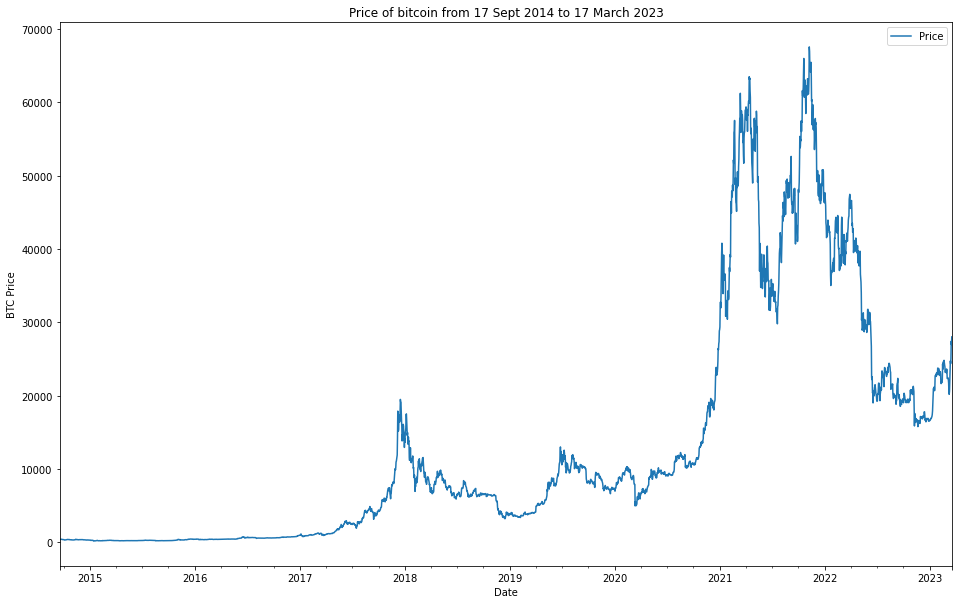

In [9]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(16,10))
plt.ylabel("BTC Price")
plt.title("Price of bitcoin from 17 Sept 2014 to 17 March 2023");

## Importing Time Series Data with Python CSV module

In [10]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC-USD.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[4])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 9, 17, 0, 0),
  datetime.datetime(2014, 9, 18, 0, 0),
  datetime.datetime(2014, 9, 19, 0, 0),
  datetime.datetime(2014, 9, 20, 0, 0),
  datetime.datetime(2014, 9, 21, 0, 0),
  datetime.datetime(2014, 9, 22, 0, 0),
  datetime.datetime(2014, 9, 23, 0, 0),
  datetime.datetime(2014, 9, 24, 0, 0),
  datetime.datetime(2014, 9, 25, 0, 0),
  datetime.datetime(2014, 9, 26, 0, 0)],
 [457.334015,
  424.440002,
  394.79599,
  408.903992,
  398.821014,
  402.152008,
  435.790985,
  423.204987,
  411.574005,
  404.424988])

In [11]:

# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985, 423.204987, 411.574005, 404.424988]))

## Creating Train and Test Sets For Time Series

In [12]:
split_size = int(0.8 * len(prices))

X_train, y_train= timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2486, 622, 2486, 622)

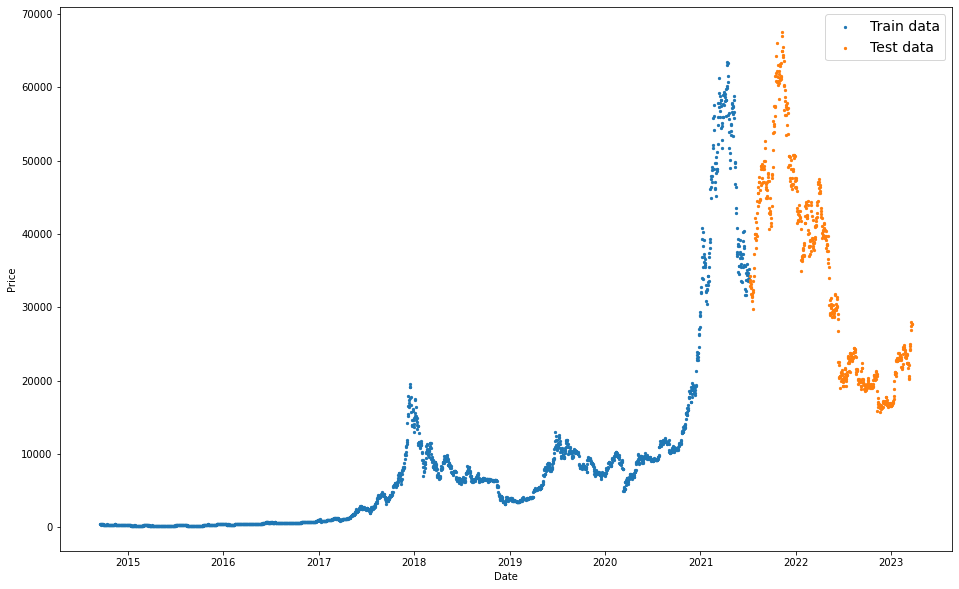

In [13]:
plt.figure(figsize=(16,10))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.show();

### Creating a Plotting Function

In [14]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
   Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

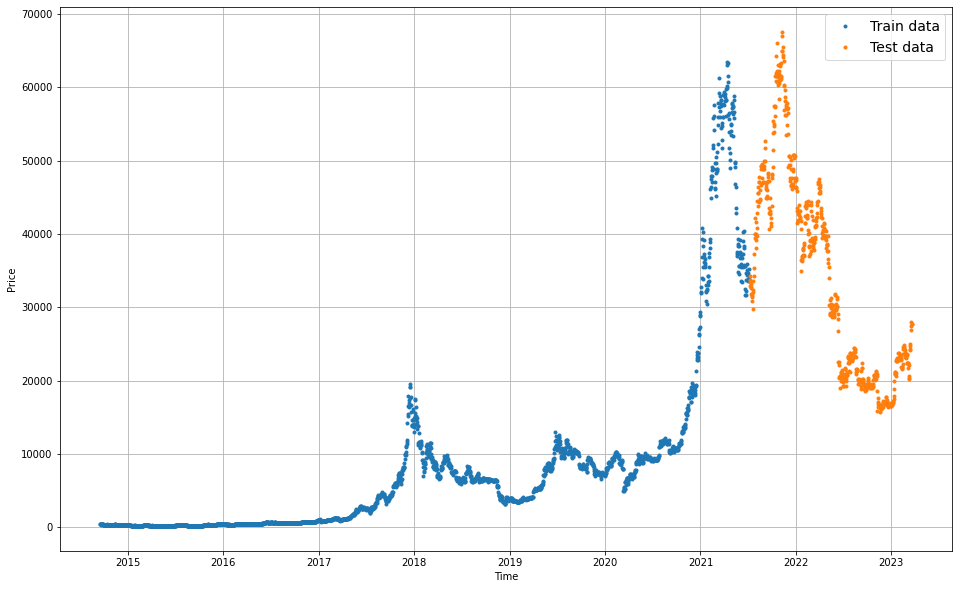

In [15]:
plt.figure(figsize=(16,10))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

### Model 0 : Naive Forecast - Baseline

In [16]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([32877.371094, 33798.011719, 33520.519531, 34240.1875  ,
        33155.847656, 32702.025391, 32822.347656, 31780.730469,
        31421.539063, 31533.068359]),
 array([20632.410156, 22163.949219, 24197.533203, 24746.074219,
        24375.960938, 25052.789063, 27423.929688, 26965.878906,
        28038.675781, 27767.236328]))

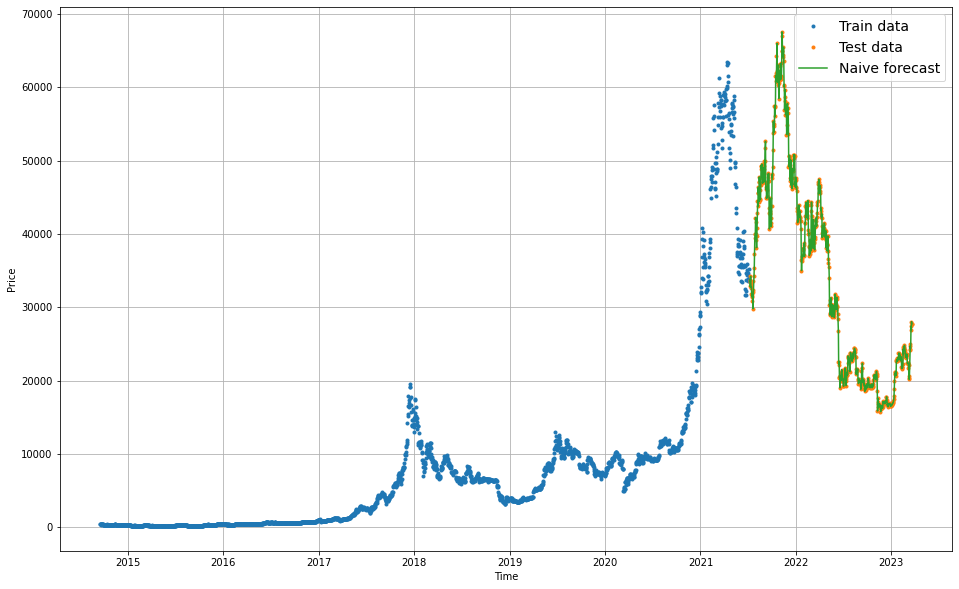

In [17]:
# Plot naive forecast
plt.figure(figsize=(16,10))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

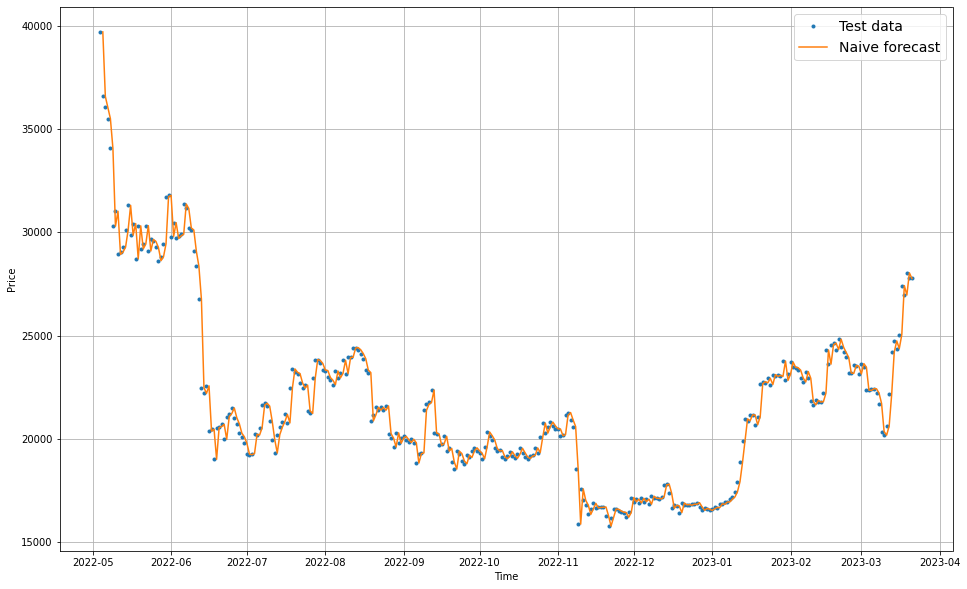

In [18]:
plt.figure(figsize=(16,10))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

## Evaluating a Time Series Model

In [19]:
import tensorflow as tf


In [20]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [21]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [22]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 806.97797,
 'mse': 1472673.6,
 'rmse': 1213.5377,
 'mape': 2.3301265,
 'mase': 1.0002272}

In [23]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

33500.962783948555

## Format Data - Part 2 - Windowing Dataset

In [24]:
HORIZON = 1
WINDOW_SIZE = 7

In [25]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset
  eg - 
  Input : [1,2,3,4,5,6,7] -> Output : ([1,2,3,4,5,6], [7])
  """
  return(x[:, :-horizon], x[:, -horizon:])

In [29]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window : {tf.squeeze(test_window).numpy()} -> Label : {tf.squeeze(test_label).numpy()}")

Window : [1 2 3 4 5 6 7] -> Label : 8


In [34]:
# Create function to view Numpy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns 1D array into 2D array of sequential windows of window_size
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [35]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3101, 3101)

In [36]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")
     

Window: [22163.949219 24197.533203 24746.074219 24375.960938 25052.789063
 27423.929688 26965.878906] -> Label: [28038.675781]
Window: [24197.533203 24746.074219 24375.960938 25052.789063 27423.929688
 26965.878906 28038.675781] -> Label: [27767.236328]
Window: [24746.074219 24375.960938 25052.789063 27423.929688 26965.878906
 28038.675781 27767.236328] -> Label: [27783.144531]


## Turning windows into training and testing datasets

In [37]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [38]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2480, 621, 2480, 621)

In [39]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]), array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [40]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

## Make a Modelling Checkpoint

In [42]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file
     

### Model 1: Dense Model (window = 7, horizon = 1)

In [43]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
19/20 [===========================>..] - ETA: 0s - loss: 4138.1440 - mae: 4138.1440  

20/20 [==============================] - 6s 37ms/step - loss: 4094.6455 - mae: 4094.6455 - val_loss: 6840.3188 - val_mae: 6840.3188
Epoch 2/100
 1/20 [>.............................] - ETA: 0s - loss: 1750.1831 - mae: 1750.1831

20/20 [==============================] - 1s 32ms/step - loss: 860.9243 - mae: 860.9243 - val_loss: 1768.5927 - val_mae: 1768.5927
Epoch 3/100
 1/20 [>.............................] - ETA: 0s - loss: 528.8853 - mae: 528.8853

20/20 [==============================] - 0s 24ms/step - loss: 413.9468 - mae: 413.9468 - val_loss: 1746.9166 - val_mae: 1746.9166
Epoch 4/100
 1/20 [>.............................] - ETA: 0s - loss: 293.7779 - mae: 293.7779

20/20 [==============================] - 0s 23ms/step - loss: 387.7740 - mae: 387.7740 - val_loss: 1119.1021 - val_mae: 1119.1021
Epoch 5/100
 1/20 [>.............................] - ETA: 0s - loss: 366.3313 - mae: 366.3313

20/20 [==============================] - 0s 24ms/step - loss: 347.6038 - mae: 347.6038 - val_loss: 1098.9391 - val_mae: 1098.9391
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 334.3660 - mae: 334.3660 - val_loss: 1116.4215 - val_mae: 1116.4215
Epoch 7/100
 1/20 [>.............................] - ETA: 0s - loss: 375.3865 - mae: 375.3865

20/20 [==============================] - 0s 24ms/step - loss: 342.3104 - mae: 342.3104 - val_loss: 1088.9004 - val_mae: 1088.9004
Epoch 8/100
12/20 [=================>............] - ETA: 0s - loss: 322.1342 - mae: 322.1342

20/20 [==============================] - 1s 35ms/step - loss: 328.3993 - mae: 328.3993 - val_loss: 1088.6687 - val_mae: 1088.6687
Epoch 9/100
14/20 [====================>.........] - ETA: 0s - loss: 335.3023 - mae: 335.3023

20/20 [==============================] - 1s 34ms/step - loss: 336.9918 - mae: 336.9918 - val_loss: 1048.9030 - val_mae: 1048.9030
Epoch 10/100
20/20 [==============================] - 0s 6ms/step - loss: 326.9657 - mae: 326.9657 - val_loss: 1116.0504 - val_mae: 1116.0504
Epoch 11/100
14/20 [====================>.........] - ETA: 0s - loss: 322.4525 - mae: 322.4525

20/20 [==============================] - 1s 33ms/step - loss: 314.8500 - mae: 314.8500 - val_loss: 1029.0154 - val_mae: 1029.0154
Epoch 12/100
20/20 [==============================] - 0s 5ms/step - loss: 310.1833 - mae: 310.1833 - val_loss: 1062.0116 - val_mae: 1062.0116
Epoch 13/100
20/20 [==============================] - 0s 5ms/step - loss: 310.5691 - mae: 310.5691 - val_loss: 1038.2428 - val_mae: 1038.2428
Epoch 14/100
20/20 [==============================] - 0s 4ms/step - loss: 322.3878 - mae: 322.3878 - val_loss: 1142.0804 - val_mae: 1142.0804
Epoch 15/100
 1/20 [>.............................] - ETA: 0s - loss: 327.3477 - mae: 327.3477

20/20 [==============================] - 0s 23ms/step - loss: 306.4186 - mae: 306.4186 - val_loss: 999.8272 - val_mae: 999.8272
Epoch 16/100
20/20 [==============================] - 0s 5ms/step - loss: 304.9862 - mae: 304.9862 - val_loss: 1034.0195 - val_mae: 1034.0195
Epoch 17/100
20/20 [==============================] - 0s 4ms/step - loss: 298.5652 - mae: 298.5652 - val_loss: 1005.4181 - val_mae: 1005.4181
Epoch 18/100
20/20 [==============================] - 0s 4ms/step - loss: 309.8922 - mae: 309.8922 - val_loss: 1024.7189 - val_mae: 1024.7189
Epoch 19/100
20/20 [==============================] - ETA: 0s - loss: 293.1437 - mae: 293.1437

20/20 [==============================] - 0s 24ms/step - loss: 293.1437 - mae: 293.1437 - val_loss: 975.9866 - val_mae: 975.9866
Epoch 20/100
20/20 [==============================] - 0s 4ms/step - loss: 294.5239 - mae: 294.5239 - val_loss: 1319.1392 - val_mae: 1319.1392
Epoch 21/100
20/20 [==============================] - 0s 5ms/step - loss: 296.2839 - mae: 296.2839 - val_loss: 1033.5232 - val_mae: 1033.5232
Epoch 22/100
20/20 [==============================] - 0s 5ms/step - loss: 286.1403 - mae: 286.1403 - val_loss: 1000.4386 - val_mae: 1000.4386
Epoch 23/100
20/20 [==============================] - 0s 5ms/step - loss: 290.5469 - mae: 290.5469 - val_loss: 1191.0096 - val_mae: 1191.0096
Epoch 24/100
 1/20 [>.............................] - ETA: 0s - loss: 298.6850 - mae: 298.6850

20/20 [==============================] - 0s 23ms/step - loss: 291.5385 - mae: 291.5385 - val_loss: 955.2833 - val_mae: 955.2833
Epoch 25/100
20/20 [==============================] - 0s 5ms/step - loss: 281.6673 - mae: 281.6673 - val_loss: 1008.6128 - val_mae: 1008.6128
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 286.2762 - mae: 286.2762 - val_loss: 1023.5755 - val_mae: 1023.5755
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 288.9106 - mae: 288.9106 - val_loss: 995.1561 - val_mae: 995.1561
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 294.7404 - mae: 294.7404 - val_loss: 966.2031 - val_mae: 966.2031
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 284.6428 - mae: 284.6428 - val_loss: 1001.1143 - val_mae: 1001.1143
Epoch 30/100
 1/20 [>.............................] - ETA: 0s - loss: 271.5643 - mae: 271.5643

20/20 [==============================] - 0s 24ms/step - loss: 306.6197 - mae: 306.6197 - val_loss: 929.4657 - val_mae: 929.4657
Epoch 31/100
20/20 [==============================] - 0s 5ms/step - loss: 286.7848 - mae: 286.7848 - val_loss: 996.0674 - val_mae: 996.0674
Epoch 32/100
 1/20 [>.............................] - ETA: 0s - loss: 289.5989 - mae: 289.5989

20/20 [==============================] - 0s 22ms/step - loss: 285.4399 - mae: 285.4399 - val_loss: 921.6473 - val_mae: 921.6473
Epoch 33/100
20/20 [==============================] - 0s 5ms/step - loss: 279.4709 - mae: 279.4709 - val_loss: 928.9357 - val_mae: 928.9357
Epoch 34/100
20/20 [==============================] - 0s 4ms/step - loss: 277.4580 - mae: 277.4580 - val_loss: 1028.7657 - val_mae: 1028.7657
Epoch 35/100
20/20 [==============================] - 0s 5ms/step - loss: 297.6582 - mae: 297.6582 - val_loss: 947.1793 - val_mae: 947.1793
Epoch 36/100
20/20 [==============================] - 0s 5ms/step - loss: 291.4488 - mae: 291.4488 - val_loss: 937.2660 - val_mae: 937.2660
Epoch 37/100
 1/20 [>.............................] - ETA: 0s - loss: 295.2314 - mae: 295.2314

20/20 [==============================] - 0s 23ms/step - loss: 275.6788 - mae: 275.6788 - val_loss: 915.7492 - val_mae: 915.7492
Epoch 38/100
20/20 [==============================] - 0s 4ms/step - loss: 281.8013 - mae: 281.8013 - val_loss: 1174.5189 - val_mae: 1174.5189
Epoch 39/100
19/20 [===========================>..] - ETA: 0s - loss: 295.4041 - mae: 295.4041

20/20 [==============================] - 0s 23ms/step - loss: 295.4377 - mae: 295.4377 - val_loss: 908.1309 - val_mae: 908.1309
Epoch 40/100
20/20 [==============================] - 0s 5ms/step - loss: 289.5726 - mae: 289.5726 - val_loss: 917.1550 - val_mae: 917.1550
Epoch 41/100
20/20 [==============================] - 0s 4ms/step - loss: 285.4994 - mae: 285.4994 - val_loss: 924.8711 - val_mae: 924.8711
Epoch 42/100
 1/20 [>.............................] - ETA: 0s - loss: 240.0955 - mae: 240.0955

20/20 [==============================] - 0s 23ms/step - loss: 290.6136 - mae: 290.6136 - val_loss: 902.6033 - val_mae: 902.6033
Epoch 43/100
20/20 [==============================] - 0s 5ms/step - loss: 306.5226 - mae: 306.5226 - val_loss: 1155.7620 - val_mae: 1155.7620
Epoch 44/100
20/20 [==============================] - 0s 4ms/step - loss: 267.2462 - mae: 267.2462 - val_loss: 905.4551 - val_mae: 905.4551
Epoch 45/100
20/20 [==============================] - 0s 4ms/step - loss: 291.5939 - mae: 291.5939 - val_loss: 929.7305 - val_mae: 929.7305
Epoch 46/100
20/20 [==============================] - 0s 5ms/step - loss: 273.9145 - mae: 273.9145 - val_loss: 1280.2086 - val_mae: 1280.2086
Epoch 47/100
 1/20 [>.............................] - ETA: 0s - loss: 442.5786 - mae: 442.5786

20/20 [==============================] - 1s 34ms/step - loss: 301.4680 - mae: 301.4680 - val_loss: 895.5137 - val_mae: 895.5137
Epoch 48/100
 1/20 [>.............................] - ETA: 0s - loss: 263.5256 - mae: 263.5256

20/20 [==============================] - 0s 23ms/step - loss: 269.5033 - mae: 269.5033 - val_loss: 885.4839 - val_mae: 885.4839
Epoch 49/100
20/20 [==============================] - 0s 5ms/step - loss: 269.1191 - mae: 269.1191 - val_loss: 1048.9999 - val_mae: 1048.9999
Epoch 50/100
20/20 [==============================] - 0s 5ms/step - loss: 280.5571 - mae: 280.5571 - val_loss: 1325.2344 - val_mae: 1325.2344
Epoch 51/100
 1/20 [>.............................] - ETA: 0s - loss: 487.5923 - mae: 487.5923

20/20 [==============================] - 0s 22ms/step - loss: 291.0424 - mae: 291.0424 - val_loss: 880.3742 - val_mae: 880.3742
Epoch 52/100
20/20 [==============================] - 0s 5ms/step - loss: 260.4960 - mae: 260.4960 - val_loss: 1192.2056 - val_mae: 1192.2056
Epoch 53/100
20/20 [==============================] - 0s 5ms/step - loss: 303.1764 - mae: 303.1764 - val_loss: 1052.6056 - val_mae: 1052.6056
Epoch 54/100
19/20 [===========================>..] - ETA: 0s - loss: 271.0362 - mae: 271.0362

20/20 [==============================] - 0s 24ms/step - loss: 270.2978 - mae: 270.2978 - val_loss: 869.0304 - val_mae: 869.0304
Epoch 55/100
20/20 [==============================] - 0s 5ms/step - loss: 264.1181 - mae: 264.1181 - val_loss: 897.9478 - val_mae: 897.9478
Epoch 56/100
20/20 [==============================] - 0s 5ms/step - loss: 270.6370 - mae: 270.6370 - val_loss: 883.2697 - val_mae: 883.2697
Epoch 57/100
20/20 [==============================] - 0s 4ms/step - loss: 271.8648 - mae: 271.8648 - val_loss: 882.1506 - val_mae: 882.1506
Epoch 58/100
 1/20 [>.............................] - ETA: 0s - loss: 339.0963 - mae: 339.0963

20/20 [==============================] - 0s 23ms/step - loss: 261.2201 - mae: 261.2201 - val_loss: 865.2317 - val_mae: 865.2317
Epoch 59/100
20/20 [==============================] - 0s 5ms/step - loss: 265.9955 - mae: 265.9955 - val_loss: 1070.1746 - val_mae: 1070.1746
Epoch 60/100
20/20 [==============================] - 0s 5ms/step - loss: 290.7241 - mae: 290.7241 - val_loss: 880.9739 - val_mae: 880.9739
Epoch 61/100
20/20 [==============================] - 0s 5ms/step - loss: 294.2108 - mae: 294.2108 - val_loss: 994.4005 - val_mae: 994.4005
Epoch 62/100
20/20 [==============================] - 0s 5ms/step - loss: 265.4705 - mae: 265.4705 - val_loss: 934.6978 - val_mae: 934.6978
Epoch 63/100
20/20 [==============================] - 0s 5ms/step - loss: 258.5837 - mae: 258.5837 - val_loss: 1024.5720 - val_mae: 1024.5720
Epoch 64/100
20/20 [==============================] - 0s 5ms/step - loss: 281.7792 - mae: 281.7792 - val_loss: 1177.4016 - val_mae: 1177.4016
Epoch 65/100
14/20 [======

20/20 [==============================] - 1s 34ms/step - loss: 270.6611 - mae: 270.6611 - val_loss: 852.2381 - val_mae: 852.2381
Epoch 66/100
20/20 [==============================] - 0s 7ms/step - loss: 255.9998 - mae: 255.9998 - val_loss: 875.0651 - val_mae: 875.0651
Epoch 67/100
20/20 [==============================] - 0s 6ms/step - loss: 256.3831 - mae: 256.3831 - val_loss: 1172.6462 - val_mae: 1172.6462
Epoch 68/100
20/20 [==============================] - 0s 7ms/step - loss: 264.1767 - mae: 264.1767 - val_loss: 860.4097 - val_mae: 860.4097
Epoch 69/100
20/20 [==============================] - 0s 6ms/step - loss: 260.1559 - mae: 260.1559 - val_loss: 894.2145 - val_mae: 894.2145
Epoch 70/100
13/20 [==================>...........] - ETA: 0s - loss: 246.7037 - mae: 246.7037

20/20 [==============================] - 1s 35ms/step - loss: 256.4580 - mae: 256.4580 - val_loss: 847.7266 - val_mae: 847.7266
Epoch 71/100
20/20 [==============================] - 0s 6ms/step - loss: 254.6777 - mae: 254.6777 - val_loss: 848.3921 - val_mae: 848.3921
Epoch 72/100
20/20 [==============================] - 0s 5ms/step - loss: 301.6694 - mae: 301.6694 - val_loss: 859.5198 - val_mae: 859.5198
Epoch 73/100
20/20 [==============================] - ETA: 0s - loss: 271.0897 - mae: 271.0897

20/20 [==============================] - 0s 26ms/step - loss: 271.0897 - mae: 271.0897 - val_loss: 843.8455 - val_mae: 843.8455
Epoch 74/100
20/20 [==============================] - 0s 4ms/step - loss: 257.6825 - mae: 257.6825 - val_loss: 848.4832 - val_mae: 848.4832
Epoch 75/100
20/20 [==============================] - 0s 4ms/step - loss: 280.3390 - mae: 280.3390 - val_loss: 1060.4401 - val_mae: 1060.4401
Epoch 76/100
20/20 [==============================] - 0s 5ms/step - loss: 273.8647 - mae: 273.8647 - val_loss: 889.6582 - val_mae: 889.6582
Epoch 77/100
20/20 [==============================] - 0s 5ms/step - loss: 261.9342 - mae: 261.9342 - val_loss: 865.8638 - val_mae: 865.8638
Epoch 78/100
20/20 [==============================] - 0s 5ms/step - loss: 276.8333 - mae: 276.8333 - val_loss: 874.5678 - val_mae: 874.5678
Epoch 79/100
20/20 [==============================] - 0s 5ms/step - loss: 256.6727 - mae: 256.6727 - val_loss: 937.6266 - val_mae: 937.6266
Epoch 80/100
20/20 [==========

20/20 [==============================] - 0s 23ms/step - loss: 267.5075 - mae: 267.5075 - val_loss: 836.1255 - val_mae: 836.1255
Epoch 84/100
20/20 [==============================] - 0s 4ms/step - loss: 250.6433 - mae: 250.6433 - val_loss: 860.6417 - val_mae: 860.6417
Epoch 85/100
 1/20 [>.............................] - ETA: 0s - loss: 218.4781 - mae: 218.4781

20/20 [==============================] - 0s 24ms/step - loss: 251.1157 - mae: 251.1157 - val_loss: 831.8876 - val_mae: 831.8876
Epoch 86/100
20/20 [==============================] - 0s 4ms/step - loss: 256.0697 - mae: 256.0697 - val_loss: 961.0527 - val_mae: 961.0527
Epoch 87/100
20/20 [==============================] - 0s 4ms/step - loss: 274.5726 - mae: 274.5726 - val_loss: 914.7037 - val_mae: 914.7037
Epoch 88/100
20/20 [==============================] - 0s 4ms/step - loss: 262.2408 - mae: 262.2408 - val_loss: 1128.9802 - val_mae: 1128.9802
Epoch 89/100
20/20 [==============================] - 0s 4ms/step - loss: 285.7117 - mae: 285.7117 - val_loss: 1063.3239 - val_mae: 1063.3239
Epoch 90/100
20/20 [==============================] - 0s 5ms/step - loss: 277.6516 - mae: 277.6516 - val_loss: 983.6813 - val_mae: 983.6813
Epoch 91/100
20/20 [==============================] - 0s 5ms/step - loss: 273.8412 - mae: 273.8412 - val_loss: 833.9626 - val_mae: 833.9626
Epoch 92/100
20/20 [========

20/20 [==============================] - 0s 26ms/step - loss: 251.3674 - mae: 251.3674 - val_loss: 829.2266 - val_mae: 829.2266


In [44]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 829.2266 - mae: 829.2266


[829.2265625, 829.2265625]

In [45]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 4ms/step - loss: 829.2266 - mae: 829.2266


[829.2265625, 829.2265625]

### Making Forecasts with a Model on the Test Dataset

In [46]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [47]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

20/20 [==============================] - 0s 2ms/step


(621, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([33052.477, 33623.887, 33438.848, 34211.582, 33333.027, 32692.324,
        32786.58 , 31860.967, 31438.562, 31335.371], dtype=float32)>)

In [48]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 829.2266,
 'mse': 1554506.0,
 'rmse': 1246.7983,
 'mape': 2.4071398,
 'mase': 1.0278038}

In [49]:
naive_results

{'mae': 806.97797,
 'mse': 1472673.6,
 'rmse': 1213.5377,
 'mape': 2.3301265,
 'mase': 1.0002272}

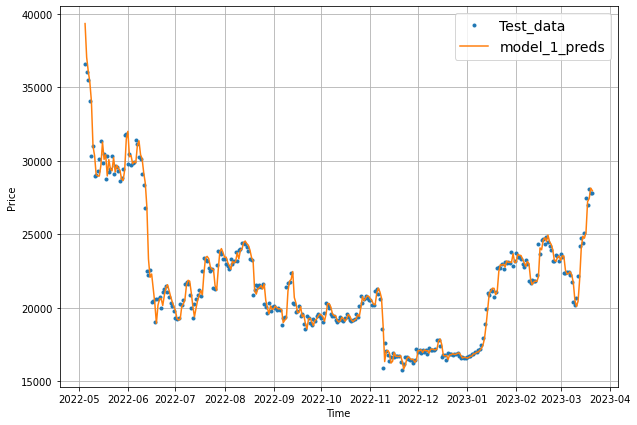

In [50]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

### Model 2 : Dense (window = 30, horizon = 1)

In [51]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [52]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3078, 3078)

In [53]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2462, 616, 2462, 616)

In [54]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [55]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 1024.1101


1024.110107421875

In [56]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 899.2830


899.282958984375

In [57]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

20/20 [==============================] - 0s 2ms/step


In [58]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 899.2831,
 'mse': 1781176.9,
 'rmse': 1334.6074,
 'mape': 2.5936258,
 'mase': 1.1115491}

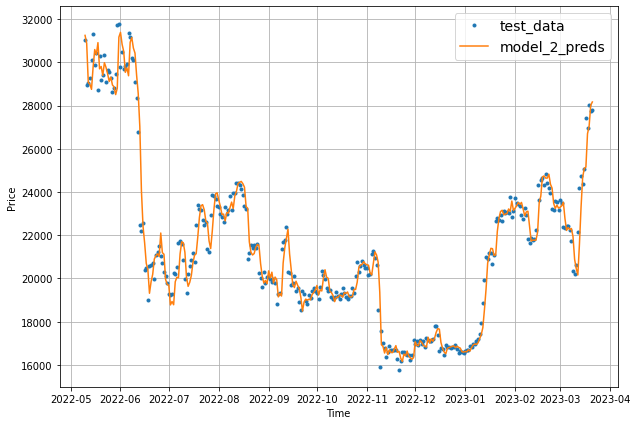

In [59]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 
     

### Model 3 : Dense (window = 30, horizon = 7)

In [60]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(3072, 3072)

In [61]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2457, 615, 2457, 615)

In [62]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [63]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)
     

20/20 [==============================] - 0s 3ms/step - loss: 1759.0602


1759.0601806640625

In [64]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 3ms/step - loss: 1741.1372


1741.13720703125

In [65]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

20/20 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[33463.34 , 33451.41 , 32797.645, 33470.16 , 33698.92 , 32360.783,
        32505.85 ],
       [34350.164, 32689.516, 34134.168, 33737.1  , 33485.023, 33482.812,
        33562.785],
       [33944.215, 33105.504, 34484.457, 33916.72 , 33414.453, 33198.598,
        33521.652],
       [34112.1  , 34055.176, 34143.27 , 34147.66 , 34450.12 , 33251.656,
        33756.832],
       [34022.15 , 34531.887, 34441.844, 33081.14 , 34190.56 , 33024.77 ,
        33457.113]], dtype=float32)>

In [66]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 620.6024 , 1271.3881 , 1231.7834 , 1814.921  , 1982.1582 ,
        1343.5365 , 1005.2871 ,  797.57367,  923.2294 , 1629.7385 ,
        2129.8655 , 3181.4119 , 4374.059  , 4842.0913 , 5004.2354 ,
        5419.0166 , 5333.1875 , 5152.8022 , 3795.8298 , 1774.4833 ,
         828.5458 ,  941.31696, 1862.0334 , 2451.112  , 2089.2188 ,
        2914.423  , 4212.7476 , 4908.66   , 4242.515  , 3349.6223 ,
        2085.4827 , 1891.1881 , 1024.0887 ,  857.702  , 1280.0323 ,
        1123.765  , 1262.226  , 1673.5966 , 1896.0178 , 1920.9403 ,
        2150.5403 , 2685.7388 , 1788.3995 ,  660.3499 ,  794.9749 ,
        1384.6144 , 2110.2747 ,  839.0089 , 1315.226  ,  745.6378 ,
         869.3125 , 1370.908  , 1469.5217 , 2111.     , 2369.2305 ,
        1995.212  , 2017.6133 , 2916.1646 , 3581.0168 , 4484.159  ,
        6915.2437 , 3853.6646 , 1706.1624 , 1486.4733 , 1557.8002 ,
        2098.4224 , 1974.3549 , 2580.711  , 1931.7098 , 2744.0212 ,
        3351.016  , 3518.053  , 4732.9985

## Make Evaluation for larger horizons

In [67]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}
     

In [68]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1741.1372,
 'mse': 6449443.5,
 'rmse': 1992.4963,
 'mape': 5.152888,
 'mase': 2.152441}

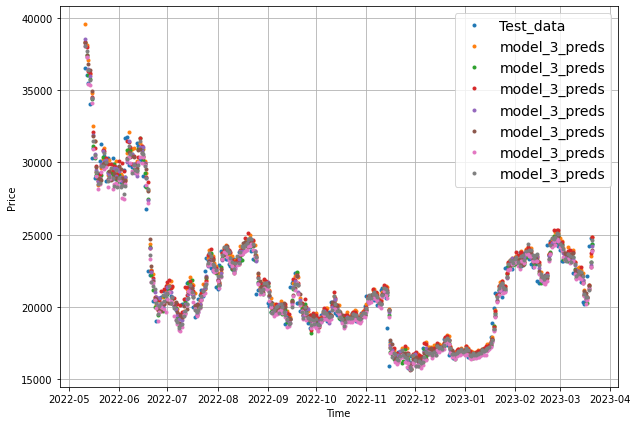

In [69]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

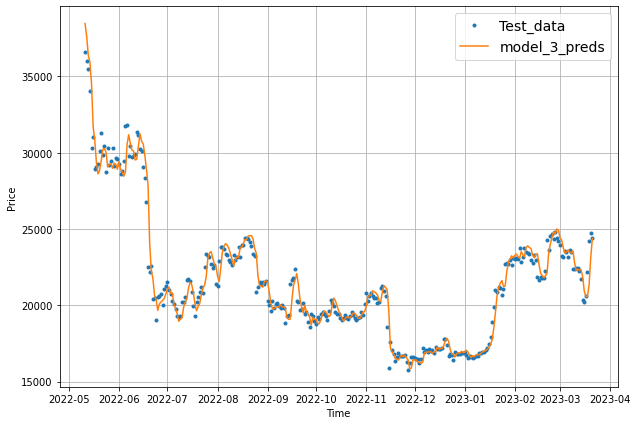

In [70]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")
     

### Which Model is performing best so far

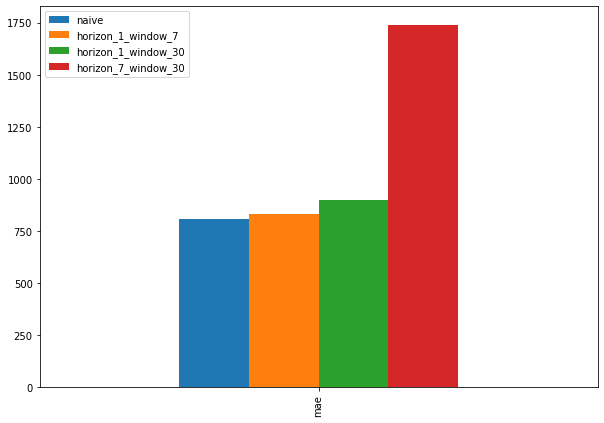

In [71]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4 : Conv1D

In [72]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [73]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3101, 3101)

In [74]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
     

(2480, 621, 2480, 621)

In [75]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [76]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[457.334]
 [424.44 ]
 [394.796]
 [408.904]
 [398.821]
 [402.152]
 [435.791]]


In [77]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])
     

In [78]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 3ms/step - loss: 839.5252


839.5252075195312

In [80]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]
     

20/20 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33025.59 , 33502.133, 33448.58 , 34076.754, 33381.305, 32752.463,
       32727.291, 31879.229, 31386.818, 31325.953], dtype=float32)>

In [81]:

# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 839.52527,
 'mse': 1580854.6,
 'rmse': 1257.3204,
 'mape': 2.4313927,
 'mase': 1.0405687}